In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
cd drive/My Drive

/content/drive/My Drive


In [3]:
ls

'[파이썬] 기본'/
'[파이썬] 라이브러리'/
 은송/
 논문/
'데이터 시각화'/
 노트패드/
 이동환/
 프로젝트/
 자연어처리/
'프랜차이즈 블로그 데이터'/
'팀프로젝트(식단추천)'/
 로보어드바이저/
'1일 영양소.gsheet'
 abcnews-date-text.csv
'공공데이터 API 연습.ipynb'
 BandPhoto_2019_08_06_18_58_33.gdoc
 BandPhoto_2019_08_06_18_58_33.jpg
 BBQ.csv
 bhc.csv
'Colab Notebooks'/
 ddangddang.csv
 drive/
'ETRI API 형태소 분석.ipynb'
 firstFlaskProject_지금까지버전.7z
 firstFlaskProject_지금까지버전.zip
 Food_choose.ipynb
 github/
'구글 코랩(google colab)'/
'제목 없는 스프레드시트.gsheet'
'제목 없는 사이트.gsite'
'html 파일'/
 ipynb/
'식단 평가 ipynb.zip'
 워드클라우드.jpg
'케라스 Keras'/
'movies_metadata (1).csv'
 movies_metadata.csv
 nene.csv
'NLP-Lab-master (4).zip'
 pelicana.csv
'Sklearn & Keras 기초 (사이킷런, 케라스)'/
 spongebob_characters_wallpaper_thumb_1920_637740.0.jpg
 TEAM_BUILDING.pdf
 telegram_chatbot/
'한국인 영양소 섭취기준.xlsx의 사본

In [4]:
cd Sklearn & Keras 기초 (사이킷런, 케라스)

/content/drive/My Drive/Sklearn & Keras 기초 (사이킷런, 케라스)


# Lab_02 군집화 
비지도학습의 대표적인 분류

### Context
#### Clustering
+ k-means Clustering
+ Hierarchical Clustering

#### Evaluation
+ Silhouette : 군집화가 잘 되었는지 안되었는지 판단하는 evaluation 함수

In [0]:
import os
from os.path import join
import copy
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import sklearn

import matplotlib.pyplot as plt

In [0]:
# sklearn 내장 데이터 중 wine 데이터를 사용할 것이다. 
## cf) sklearn의 내장 데이터는 sklearn의 datasets에 저장되어 있다.
from sklearn.datasets import load_wine
wine = load_wine()

이번 군집화 실습을 위해 sklearn 내장 데이터인 와인 데이터를 불러오겠습니다.<br>
와인 데이터셋은 알콜, 말산, 페놀 등 13개의 변수를 가지고 있으며, 1,2,3 와인 등급을 라벨 데이터로 가지고 있습니다.

In [7]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [0]:
data = wine.data
label = wine.target
columns = wine.feature_names

In [9]:
data = pd.DataFrame(data, columns = columns)
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [10]:
data.shape

(178, 13)

In [11]:
data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
alcohol                         178 non-null float64
malic_acid                      178 non-null float64
ash                             178 non-null float64
alcalinity_of_ash               178 non-null float64
magnesium                       178 non-null float64
total_phenols                   178 non-null float64
flavanoids                      178 non-null float64
nonflavanoid_phenols            178 non-null float64
proanthocyanins                 178 non-null float64
color_intensity                 178 non-null float64
hue                             178 non-null float64
od280/od315_of_diluted_wines    178 non-null float64
proline                         178 non-null float64
dtypes: float64(13)
memory usage: 18.2 KB


# Clustering "비슷한 애들끼리 묶는 것"
<p>클러스터링은 주어진 데이터들의 특성을 고려해 데이터 클러스터를 정의하고, 클러스터를 대표할 수 있는 대표점을 찾는 비지도 학습의 대표적인 알고리즘 입니다.<br>
간단히 말해서, 비슷한 특성을 가진 데이터끼리 묶는다고 말할 수 있습니다. </p>

## 1. k-Means 클러스터링

k-means 클러스터링은 대표적인 클러스터링 알고리즘 중 하나로, <u>각 클러스터에 할당된 데이터 포인트들의 평균 좌표를 이용해 중심점을 반복적으로 업데이트하며 클러스터를 형성하는 알고리즘</u> 입니다.<br><br>

<h3> &lt; k-means Clustering 알고리즘은 3가지 단계로 이루어집니다. &gt;</h3><br>
* <b>Step 1</b>. 각 데이터 포인트 i 에 대해 가장 가까운
    중심점을 찾고, 그 중심점에 해당하는 클러스터를 할당합니다.
    <br>(가까운 중심점을 찾을 때는, **유클리드 거리**를 사용합니다.)<br><br>
* <b>Step 2</b>. 할당된 클러스터를 기반으로 새로운 중심점을 계산합니다.
    중심점은 클러스터 내부 점들 좌표의 **산술 평균(mean)**
    으로 합니다.<br><br>
* <b>Step 3</b>. 각 클러스터의 할당이 바뀌지 않을 때까지 반복합니다.<br>
<br>

<h3> &lt; 점과 점사이의 거리를 어떻게 측정할 수 있을까?  &gt; </h3>

 k-means clustering은 거리 기반 알고리즘이므로 여러가지 방법으로 거리를 측정할 수 있습니다.<br>
 #### 1. Manhattan Distance - 각 축에 대해 수직으로만 이동하여 계산하는 거리 측정방식
 $$D(x,y) = {{\sum_{i=1}^{d}  |x_i - y_i|} } $$
 ![./img/Manhattan.png](https://drive.google.com/uc?id=1dM8BDmWMMKaHSkjkoakoaqsDoclfecAs)
 
 #### 2. Euclidean Distance - 점과 점사이의 가장 짧은 거리를 계산하는 거리 측정방식
 $$D(x,y) = {\sqrt{\sum_{i=1}^{d}  (x_i - y_i)^2} } $$
 ![./Images/Euclidean.png](https://drive.google.com/uc?id=1SNx-e0dL3EmvmNjHnHmjksqXL12NtYsM)
 
 <br>

#### 준비
wine 데이터는 13개의 컬럼을 가지고 있고, 하나의 데이터(행)는 13개의 차원으로 이루어진 벡터라고 볼 수 있습니다. <br>
13차원은 우리 눈으로 볼 수 있도록 표현하기 어려우므로 앞에서 배운 pca를 통해 2차원으로 만들어 시각화할 수 있도록 변환하겠습니다.<br>
그 전에 각 변수들의 값의 범위가 서로 다르므로 min-max 정규화를 통해 조정해주겠습니
다.

* PCA는 여러 변수들의 차원을 축소해 같은 범례의 축 위에 표현하는 것이기에 PCA를 하기 전에는 스케일링(Scaling)을 해줘야 한다.

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data = pca.fit_transform(data)

In [15]:
data.shape

(178, 2)

#### 1) 모델 불러오기 및 정의하기
클러스터링은 비지도학습이므로 클러스터의 수는 라벨의 수와 관계 없지만, 3개의 군집을 형성하도록 해보겠습니다.<br><br>
<b>k-means 클러스터링은 sklearn의 cluster 패키지에 있습니다. </b>

In [0]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)

#### 2) 모델 학습하기 (클러스터링을 통한 중심점 찾기)

In [17]:
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

#### 3) 클러스터 할당

In [0]:
cluster = kmeans.predict(data)

In [19]:
## cluster 결과값 보기  >>> 각 데이터의 군집이 정수로 매겨져 리스트를 이루고 있다.

print(cluster)
print(len(cluster))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 1 2 2 2 2 1 2 1
 1 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
178


In [20]:
len(data)

178

#### 4) 결과 살펴보기

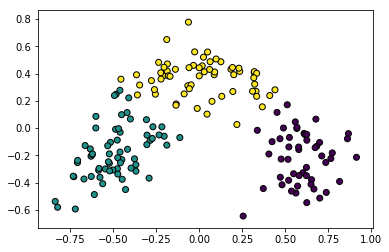

In [21]:
plt.scatter(data[:, 0], data[:, 1], c=cluster, linewidth=1, edgecolor='black')
plt.show()

## 2. Hierarchical Clustering
* <b>기본</b>
  <br>Hierarchical Clustering은 거리(Distance) 또는 유사도(Similarity)를 기반으로 클러스터를 형성하는 알고리즘 입니다. k-means Clustering과 다르게 클러스터의 수를 설정해 줄 필요가 없으며, 클러스터 형태를 시각적으로 표현해주는 덴드로그램을 통해 적절한 클러스터의 수를 선택할 수 있습니다.<br><br>

* <b>종류</b>
  <br>Hierachichal Clustering에는 Bottom-Up 방식의 Agglomerative Method와 Top-Down 방식의 Divisive Method로 나뉩니다. 이번 단원에서는 Agglomerative Method를 사용해 실습을 진행합니다. Bottom-Up 방식은 전체 데이터를 각각 하나의 군집으로 보는 것을 시작으로 비슷한 것끼리 묶어서 최종적으로 원하는 군집의 수로 결론을 도출하는 방법입니다. (Top-Down의 경우 복잡도가 높기때문에 잘 사용하지 않는다.)
<br><br>

* <b>과정</b>
  <br>Agglomerative Method를 사용한 Hierarchical Clustering 알고리즘은 3가지 단계로 이루어집니다.<br>
  Step 1. 각 데이터 포인트를 클러스터로 할당합니다. (n개의 클러스터)<br>
  Step 2. 가까운 클러스터끼리 병합합니다.<br>
  Step 3. 1개의 클러스터가 될 때까지 반복합니다.
  <br>

### 어떻게 가장 가까운 클러스터를 찾을 수 있을까?
방금전 거리 측정 방법으로 맨하탄 거리, 유클리디언 거리에 대해 배웠었습니다.<br>
k-means에서는 각 클러스터의 중심점 간의 거리로 클러스터간 거리를 계산했었습니다.<br> 이번 수업에서는 새로운 클러스터간 거리를 계산하는 방법에 대해 알아보겠습니다.<br>
#### 1. Single Linkage - 두 클러스터 내의 가장 가까운 점 사이의 거리 
두 군집 사이에 가장 가까운 점 사이의 거리를 계산해서 그 거리가 가장 가까운 두 군집을 같은 군집으로 묶어준다.
![Single Linkage](https://drive.google.com/uc?id=1cSwuhpgx7R4aPq5U0ejWX0ooqz6YNx6j)
<br>
#### 2. Complete Linkage - 두 클러스터 내의 가장 먼 점 사이의 거리
두 군집 사이에 가장 먼 점 사이의 거리를 계산해서 그 거리가 가장 가까운 두 군집을 같은 군집으로 묶어준다.
![Complete Linkage](https://drive.google.com/uc?id=1aFEiwccJXk3O9RBN8edhsbMPM8bCZSmA)
<br>
#### 3. Average Linkage - 두 클러스터 내의 모든 점 사이의 평균 거리
두 군집 사이의 모든 점의 평균 거리를 계산해서 그 거리가 가장 가까운 두 군집을 같은 군집으로 묶어준다.
![Average Linkage](https://drive.google.com/uc?id=1keHn0W4d7N7a4xrph2ARxc2ehiEO-2cq)

3개 거리 측정 방식의 결과와 차이점을 살펴보겠습니다.

## Single Linkage

#### 1) 모델 불러오기 및 정의하기

In [0]:
from sklearn.cluster import AgglomerativeClustering

# AgglomerativeClustering의 linkage로 위의 3가지 거리 측정 방식 중 원하는 방식으로 설정한다.
single_clustering = AgglomerativeClustering(n_clusters=3, linkage='single')

#### 2) 모델 학습하기 (클러스터링을 통한 중심점 찾기)

In [23]:
single_clustering.fit(data)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='single', memory=None, n_clusters=3,
                        pooling_func='deprecated')

#### 3) 클러스터 할당

AgglomerativeClustering 객체의 클러스터는 fit할때 할당되기에 label_로 찍어주면 확인이 가능하다.

> k-means의 경우 fit을 한 다음 데이터의 군집화 된 결과물(클러스터)을 확인하기 위해서는 predict를 이용했는데 hierarchical clustering은 predict가 아닌 lable_을 통해서 군집화 결과를 확인한다.

In [0]:
single_cluster = single_clustering.labels_

#### 4) 결과 살펴보기
* 산점도

밑의 그림을 통해 알 수 있겠지만 single linkage의 경우 데이터의 Noise에 매우 약하다.
다시 말하면, 가까운 군집끼리 계속해서 묶어주기때문에 결국 대부분의 데이터가 하나의 군집으로 묶이고 완전 특이 데이터만 따로 군집을 형성하게 된다.  

* 데이터의 노이즈에 약하다 == 각 군집의 경계가 모호하다 (확실히 구분되지 않는다)

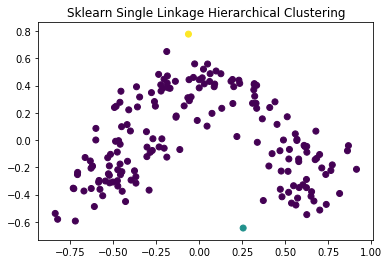

In [25]:
plt.scatter(data[:,0], data[:,1], c=single_cluster)
plt.title('Sklearn Single Linkage Hierarchical Clustering')
plt.show()

* 덴드로그램을 그려보자 

그림을 보면 알 수 있듯이 한쪽으로 치우쳐진 것으로 나타난다. 

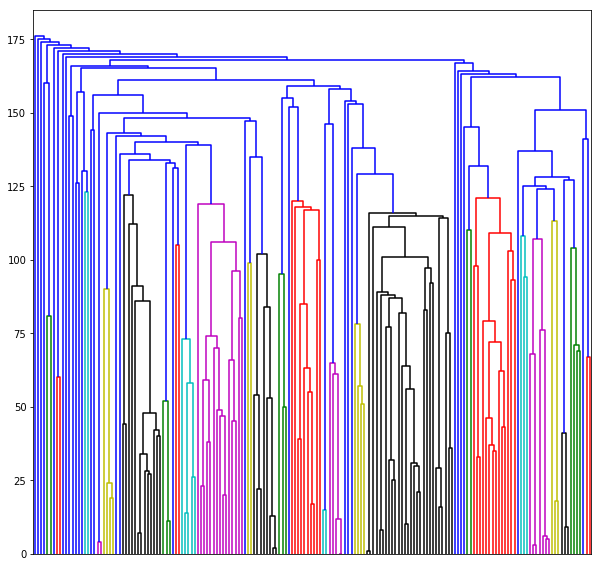

In [26]:
from scipy.cluster.hierarchy import dendrogram
plt.figure(figsize=(10,10))

# Hierarchical Clustering의 자식 노드
children = single_clustering.children_

# 각 자식 노드간의 거리 정보를 가지고 있지 않기 때문에, 균일하게 그리도록 합니다.
distance = np.arange(children.shape[0])

# 각 클러스터 단계를 포함한 노드의 수 계산
no_of_observations = np.arange(2, children.shape[0]+2)

# 덴드로그램을 그리기위한 연결 매트릭스를 생성합니다.
linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

# 덴드로그램을 그립니다.
dendrogram(linkage_matrix, p = len(data), labels = single_cluster, 
           show_contracted=True, no_labels = True, )
plt.show()

## Complete Linkage

#### 1) 모델 불러오기 및 정의하기

In [0]:
complete_clustering = AgglomerativeClustering(n_clusters=3, linkage='complete')

#### 2) 모델 학습하기 (클러스터링을 통한 중심점 찾기)

In [28]:
complete_clustering.fit(data)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=3,
                        pooling_func='deprecated')

#### 3) 클러스터 할당

In [0]:
complete_cluster = complete_clustering.labels_

#### 4) 결과 살펴보기
* 산점도

complete linkage 는 군집 간 가장 멀리있는 데이터를 사용해서 계산을 하다보니 Noise에 좀 더 강한 특성을 가진다. (다시 말하면 single linkage보다 각 군집의 성격을 좀 더 잘 포착한다) 

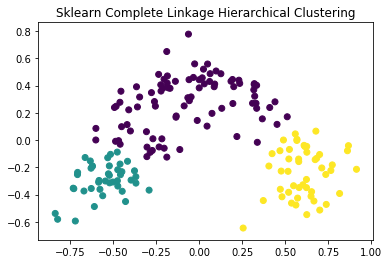

In [30]:
plt.scatter(data[:,0], data[:,1], c=complete_cluster)
plt.title('Sklearn Complete Linkage Hierarchical Clustering')
plt.show()

* 덴드로그램

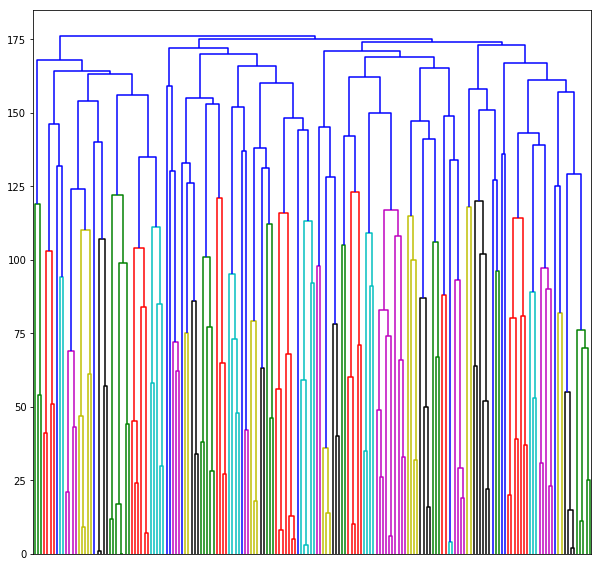

In [31]:
from scipy.cluster.hierarchy import dendrogram
plt.figure(figsize=(10,10))

# Hierarchical Clustering의 자식 노드
children = complete_clustering.children_

# 각 자식 노드간의 거리 정보를 가지고 있지 않기 때문에, 균일하게 그리도록 합니다.
distance = np.arange(children.shape[0])

# 각 클러스터 단계를 포함한 노드의 수 계산
no_of_observations = np.arange(2, children.shape[0]+2)

# 덴드로그램을 그리기위한 연결 매트릭스를 생성합니다.
linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

# 덴드로그램을 그립니다.
dendrogram(linkage_matrix, p = len(data), labels = complete_cluster, 
           show_contracted=True, no_labels = True, )
plt.show()

## Average Linkage

> Average는 single과  complete의 특성을 모두 가진 것이기에 평균적으로 세가진 군집화 방법 중 가장 좋은 성능을 보인다.

#### 1) 모델 불러오기 및 정의하기

In [0]:
average_clustering = AgglomerativeClustering(n_clusters=3, linkage='average')

#### 2) 모델 학습하기 (클러스터링을 통한 중심점 찾기)

In [33]:
average_clustering.fit(data)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=3,
                        pooling_func='deprecated')

#### 3) 클러스터 할당

In [0]:
average_cluster = average_clustering.labels_

#### 4) 결과 살펴보기
* 산점도

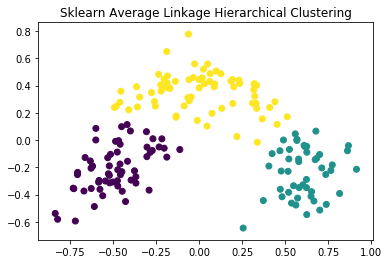

In [35]:
plt.scatter(data[:,0], data[:,1], c=average_cluster)
plt.title('Sklearn Average Linkage Hierarchical Clustering')
plt.show()

* 덴드로그램

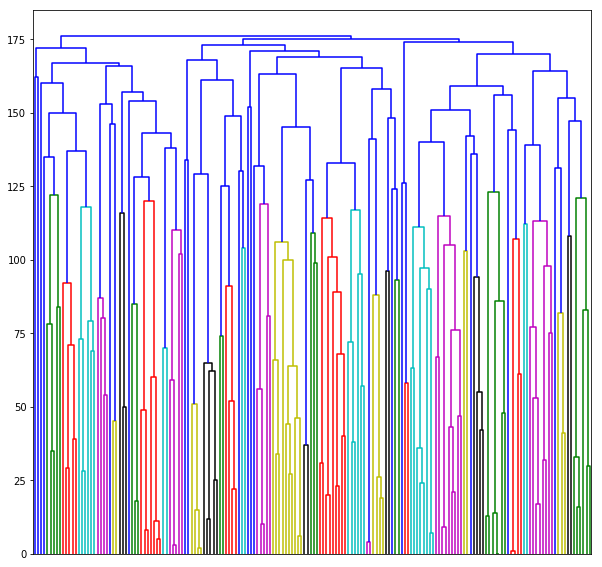

In [36]:
from scipy.cluster.hierarchy import dendrogram
plt.figure(figsize=(10,10))

# Hierarchical Clustering의 자식 노드
children = average_clustering.children_

# 각 자식 노드간의 거리 정보를 가지고 있지 않기 때문에, 균일하게 그리도록 합니다.
distance = np.arange(children.shape[0])

# 각 클러스터 단계를 포함한 노드의 수 계산
no_of_observations = np.arange(2, children.shape[0]+2)

# 덴드로그램을 그리기위한 연결 매트릭스를 생성합니다.
linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

# 덴드로그램을 그립니다.
dendrogram(linkage_matrix, p = len(data), labels = average_cluster, 
           show_contracted=True, no_labels = True, )
plt.show()

### 클러스터링 결과 비교하기
1. <h3>Single Linkage</h3>
    + 두 클러스터 내의 가장 가까운 점을 기준으로 클러스터를 합치기 클러스터 사이의 노이즈에 매우 민감한 특성이 있습니다. 또한 구 형태가 아닌 데이터에 대해 클러스터를 잘 형성한다는 특성이 있습니다.<br>
    
    + wine 데이터는 모든 데이터가 연결되어 있는 듯한 분포를 가지고 있기 때문에, 각 클러스터의 경계가 모호한 노이즈가 많은 형태를 띠고 있습니다. <br>Single Linkage가 구 형태가 아닌 데이터에 대해 클러스터를 잘 형성한다는 특성이 있지만, 위의 데이터의 경우 Single Linkage 방법을 사용하면 좋은 클러스터를 생성하기 어렵습니다.

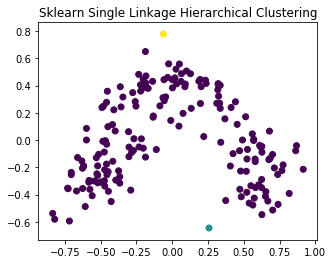

In [37]:
plt.figure(figsize=(5,4))

plt.scatter(data[:,0], data[:,1], c=single_cluster)
plt.title('Sklearn Single Linkage Hierarchical Clustering')
plt.show()

2. <h3>Complete Linkage</h3>
+ 두 클러스터 내에 가장 먼 점을 기준으로 클러스터를 합치기 때문에 클러스터 사이의 노이즈와 이상치에 민감하지 않은 특성이 있습니다.<br>
+ 노이즈에 민감하지 않다는 특성을 가진 Complete Linkage가 좋은 성능을 보여주었습니다. 
    <br><br>
3. <h3>Average Linkage</h3>
+ Single Linkage와 Complete Linkage의 중간쯤에 위치한 Average Linkage가 가장 정답에 가까운 클러스터를 형성한 것을 확인할 수 있습니다. 

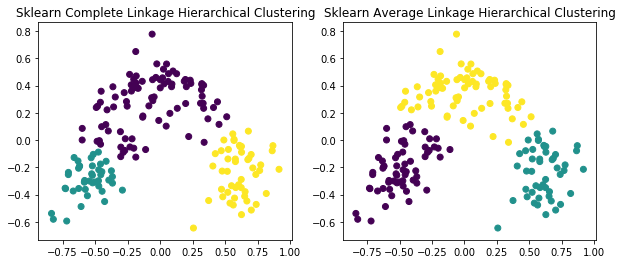

In [38]:
plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
plt.scatter(data[:,0], data[:,1], c=complete_cluster)
plt.title('Sklearn Complete Linkage Hierarchical Clustering')

plt.subplot(1, 2, 2)
plt.scatter(data[:,0], data[:,1], c=average_cluster)
plt.title('Sklearn Average Linkage Hierarchical Clustering')
plt.show()

## Evaluation _ 클러스터링(군집화)가 잘되었는지 확인해보자

### Silhouette
+ 실루엣 값은 한 클러스터 안의 데이터들이 다른 클러스터와 비교해서 얼마나 비슷한가를 나타냅니다.<br>
+ 같은 클러스터 내의 점들간 거리는 가깝고(cohesion) 서로 다른 클러스터 간의 거리는 멀수록(separation) 높은 값을 얻을 수 있습니다.<br>
+ 실루엣 값이 1에 근접한다는 것은 같은 클러스터 내의 평균거리가 다른 클러스터와의 평균거리보다 가깝다는 것을 의미합니다.<br>
+ 일반적으로 실루엣 값이 <b>0.5</b>보다 크다면 데이터가 잘 클러스터링 되었다는 것을 나타냅니다.
<br><br>

실루엣 공식은 다음과 같습니다.
$$ S_i = { {(b_i - a_i)} \over max(a_i, b_i) }$$

$$ a_i\ :\ 같은\ 클러스터\ 내의\ 모든\ 점들\ 간\ 평균\ 거리 $$
$$ b_i\ :\ \bar d\ =\ (i,c)의\ 최솟값 \ == \ 가장 \ 가까운 \ 군집과의 \ 거리$$
$$ \bar d\ =\ (i,c)\ :\ 다른\ 클러스터\ c와\ i번째 데이터 와의\ 평균\ 거리$$
<br>
* 결과적으로 군집화가 잘되있다면 a는 작을 수록 좋고(같은 군집내의 모든 점들은 가깝게 뭉쳐있다) b는 클수록 좋다(군집과 군집은 서로 멀리 떨어져 있다)<br>
* 위의 식을 이해해보면 a는 최소값이 0일 것이고 b는 최소한 0보다 클 것이다. 따라서 만약 군집화가 잘 이루어졌다면 max(a,b)는 b가 될 것이고, b-a도 b가 될 것이다. 이 경우 Silhouette의 값은 1이 나오게된다.
   + 따라서 군집화가 잘되었다면 Silhouette 값은 1이되고 1보다 작을 수록 군집화가 잘 안된것이다.  



<br><br>
직관적으로 수식을 이해해보겠습니다. a<sub>i</sub>는 같은 클러스터 내의 데이터 들이 잘 모여있다면 적은 값을 나타내고, b<sub>i</sub>는 각 클러스터들이 멀리 떨어져있다면 큰 값을 나타내게 됩니다.<br>
따라서 수식 S<sub>i</sub>에 따르면, 아주 잘 형성된(같은 클러스터는 가깝고 다른 클러스터끼리는 먼) 클러스터 형태일 때 분모는 b<sub>i</sub>이 되고,<br> 분자는 b<sub>i</sub>에서 아주 작은 값인 a<sub>i</sub>가 빠져 1에 가까운 실루엣 값을 얻을 수 있습니다.
<br><br>

<h4> 실루엣 주의점 _ outlier(이상점)의 존재 </h4>
어떤 데이터에 대부분의 데이터와 매우 멀리 동 떨어진 outlier(이상 데이터)가 존재한다면 Silhouette을 구할 때 b가 매우 커져 Silhouette 값이 크게 나올 수 있다. 이를 해결하기 위해서는 <b>미리 데이터를 전처리해서 이상 데이터값을 없애는 것</b>이 필요하다.
<br><br>
군집화를 완료하고 Silhouette 값을 구하기 전에 군집화 결과를 산점도를 통해 시각화해서 해당 모델의 군집화 성능을 가늠하고 이상데이터의 존재 유무를 확인하자.
<br><br>


  

## 가장 좋은 성능을 보이는 Cluster의 적정 갯수를 찾아보자  

> 군집화를 해야 할 때 몇개의 군집으로 군집화를 할지에 대해서 논리적인 근거와 배경을 제시하기 위해서 군집화의 평가도구(silhouette)을 활용해 적정 군집수를 찾아보자.

<br>
<b>k-means 클러스터링</b>과 <b>Average Linkage를 사용한 Hierarchical 클러스터링</b>에서 가장 높은 점수의 클러스터 수는 무엇인지 알아보겠습니다.
<br><br>
Silhouette 스코어링은 Sklearn의 metrics 패키지에 있습니다.

#### 1) k-means

In [0]:
from sklearn.metrics import silhouette_score

In [43]:
best_n = 1
best_score = -1

# 적정 클러스터링 갯수를 찾기 원하는 범위를 정해준다.
for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster)
    kmeans.fit(data)
    cluster = kmeans.predict(data)
    # silhouette_score에 들어가는 것(데이터, 라벨)
    score = silhouette_score(data, cluster)
    
    print('클러스터의 수 : {}, 실루엣 점수 : {:.2f}'.format(n_cluster, score))
    if score > best_score :
        best_n = n_cluster
        best_score = score
        
print('가장 높은 실루엣 점수를 가진 클러스터 수 : {}, 실루엣 점수 : {:.2f}'.format(best_n, best_score))

클러스터의 수 : 2, 실루엣 점수 : 0.49
클러스터의 수 : 3, 실루엣 점수 : 0.57
클러스터의 수 : 4, 실루엣 점수 : 0.49
클러스터의 수 : 5, 실루엣 점수 : 0.46
클러스터의 수 : 6, 실루엣 점수 : 0.41
클러스터의 수 : 7, 실루엣 점수 : 0.38
클러스터의 수 : 8, 실루엣 점수 : 0.38
클러스터의 수 : 9, 실루엣 점수 : 0.39
클러스터의 수 : 10, 실루엣 점수 : 0.41
가장 높은 실루엣 점수를 가진 클러스터 수 : 3, 실루엣 점수 : 0.57


#### 2) Average Linkage Hierarchical Clustering

In [41]:
from sklearn.metrics import silhouette_score

best_n = 1
best_score = -1

for n_cluster in range(2, 11):
    average_clustering = AgglomerativeClustering(n_clusters= n_cluster, linkage='average')
    average_clustering.fit(data)
    cluster = average_clustering.labels_
    score = silhouette_score(data, cluster)
    
    print('클러스터의 수 : {}, 실루엣 점수 : {:.2f}'.format(n_cluster, score))
    if score > best_score :
        best_n = n_cluster
        best_score = score
        
print('가장 높은 실루엣 점수를 가진 클러스터 수 : {}, 실루엣 점수 : {:.2f}'.format(best_n, best_score))



클러스터의 수 : 2, 실루엣 점수 : 0.49
클러스터의 수 : 3, 실루엣 점수 : 0.56
클러스터의 수 : 4, 실루엣 점수 : 0.48
클러스터의 수 : 5, 실루엣 점수 : 0.42
클러스터의 수 : 6, 실루엣 점수 : 0.37
클러스터의 수 : 7, 실루엣 점수 : 0.34
클러스터의 수 : 8, 실루엣 점수 : 0.34
클러스터의 수 : 9, 실루엣 점수 : 0.37
클러스터의 수 : 10, 실루엣 점수 : 0.33
가장 높은 실루엣 점수를 가진 클러스터 수 : 3, 실루엣 점수 : 0.56


## k-means와 hierarchical 비교

k-means의 경우 내부 모형의 복잡도가 높기 때문에 좋은 성능을 보이지만 많은 양의 데이터를 처리하기에는 무리가 있다(시간이 오래 걸린다.)

따라서 데이터의 양이 많다면 hierarchical clustering을 사용하고 데이터가 많지 않다면 k-means를 사용하자.

<br><br><br><br><br><br><br><br>


### Reference
- Wikipedia, Clustering : https://ko.wikipedia.org/wiki/클러스터_분석
- Wikipedia, Manhattan distance : https://ko.wikipedia.org/wiki/맨해튼_거리
- Wikipedia, Euclidean distance : https://ko.wikipedia.org/wiki/유클리드_거리
- Sklearn, Wine dataset : https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html
- Sklearn, k-Means Clustering : https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
- Sklearn, Hierarchical Clustering : https://www.google.com/url?q=http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html&sa=U&ved=0ahUKEwj_2aiGvt7hAhXLi7wKHei8CNsQFggEMAA&client=internal-uds-cse&cx=016639176250731907682:tjtqbvtvij0&usg=AOvVaw0zVZAVTxgORo-7LbgrNv_o
- Sklearn, Silhouette : https://www.google.com/url?q=http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html&sa=U&ved=0ahUKEwi5lrTZwd7hAhUqCqYKHWCZCTEQFggEMAA&client=internal-uds-cse&cx=016639176250731907682:tjtqbvtvij0&usg=AOvVaw0-ZT8AJZRmR-qNpN-62Ei-
- Sklearn, Silhouette Example : https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py
- Scipy, Dendrogram : https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html